In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('resources/nba_new.csv', index_col='Unnamed: 0')

In [3]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Sport
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,Basketball
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0,Basketball
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN,Basketball
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0,Basketball
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0,Basketball
...,...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0,Basketball
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0,Basketball
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0,Basketball
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0,Basketball


In [4]:
def lbs_to_kg(weight_lbs):
    try:
        return round(weight_lbs*0.453592, 2)
    except:
        np.nan

In [5]:
def feetInches_to_cm(height_str):
    try:
        feet, inches = map(int, height_str.split("-"))
        return (feet*30.48) + (inches*2.54)
    except:
        np.nan

In [6]:
df['WeightInKg'] = df['Weight'].apply(lambda x: lbs_to_kg(x) if pd.notna(x) else x)
df['HeightInCm'] = df['Height'].apply(lambda x: feetInches_to_cm(x) if pd.notna(x) else x)

In [7]:
print(df[['Weight','Height','WeightInKg','HeightInCm']])

     Weight Height  WeightInKg  HeightInCm
0     180.0    6-2       81.65      187.96
1     235.0    6-6      106.59      198.12
2     205.0    6-5       92.99      195.58
3     185.0    6-5       83.91      195.58
4     231.0   6-10      104.78      208.28
..      ...    ...         ...         ...
453   203.0    6-3       92.08      190.50
454   179.0    6-1       81.19      185.42
455   256.0    7-3      116.12      220.98
456   231.0    7-0      104.78      213.36
457     NaN    NaN         NaN         NaN

[458 rows x 4 columns]


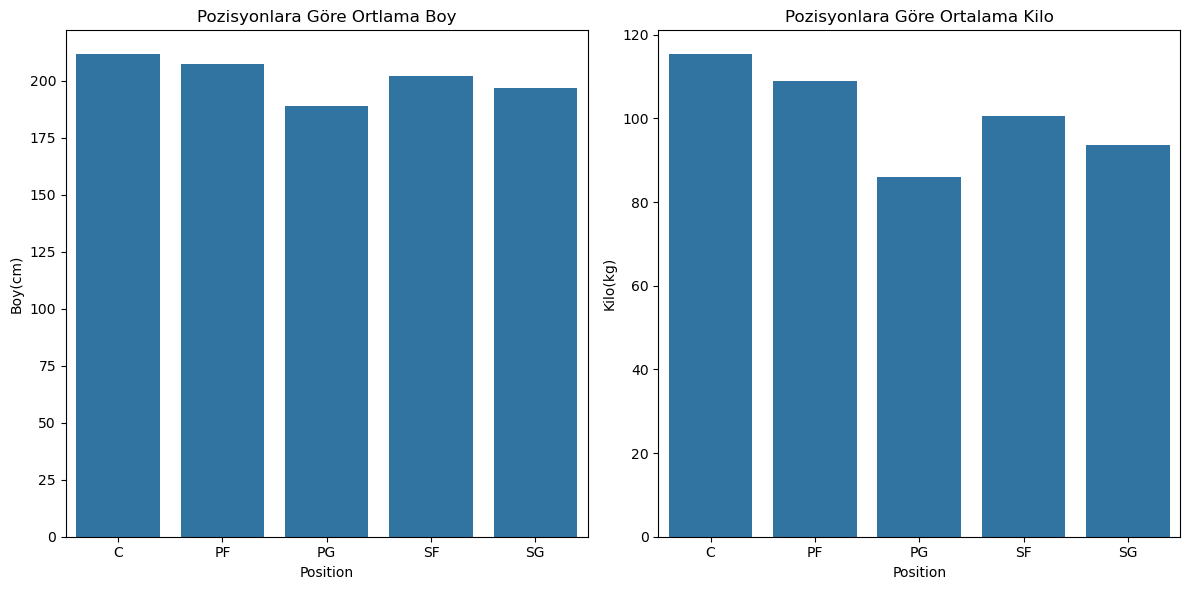

In [8]:
avg_stats = df.groupby('Position').agg({'HeightInCm': 'mean', 'WeightInKg': 'mean'})

plt.figure(figsize=(12,6))

# Pozisyonlara göre ortama boy grafiği
plt.subplot(1,2,1)
sns.barplot(x=avg_stats.index, y='HeightInCm', data=avg_stats)
plt.title('Pozisyonlara Göre Ortlama Boy')
plt.ylabel('Boy(cm)')

# Pozisyonlara göre ortlama kilo grafiği
plt.subplot(1,2,2)
sns.barplot(x=avg_stats.index, y='WeightInKg', data=avg_stats)
plt.title('Pozisyonlara Göre Ortalama Kilo')
plt.ylabel('Kilo(kg)')

plt.tight_layout()
plt.show()

In [9]:
#Veri setindeki toplam eksik değer sayısını bulunuz.
print("Veri setindeki toplam eksik değer sayısı: ", df.isnull().sum().sum())

Veri setindeki toplam eksik değer sayısı:  106


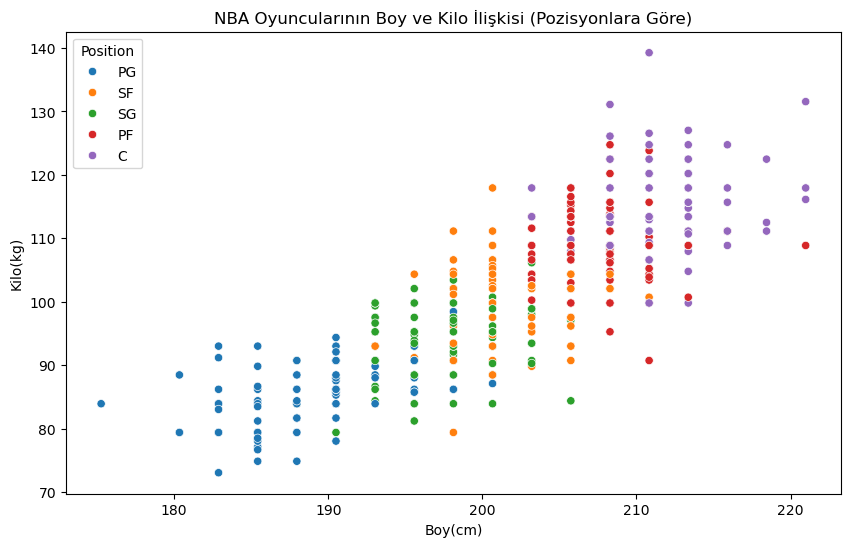

In [10]:
#Scatter plot ile boy ve kilo ilişkisini pozisyonlara göre gösterelim
plt.figure(figsize=(10,6))
sns.scatterplot(x='HeightInCm', y='WeightInKg', hue='Position', data=df)
plt.title('NBA Oyuncularının Boy ve Kilo İlişkisi (Pozisyonlara Göre)')
plt.xlabel('Boy(cm)')
plt.ylabel('Kilo(kg)')
plt.show()

Eksik Veri Analizi Alıştırma Soruları

In [11]:
#Her sütundaki eksik değer sayısını bulunuz.
print("Her sütundaki eksik değer sayısı:\n", df.isnull().sum())

Her sütundaki eksik değer sayısı:
 Name           1
Team           1
Number         1
Position       1
Age            1
Height         1
Weight         1
College       85
Salary        12
Sport          0
WeightInKg     1
HeightInCm     1
dtype: int64


In [12]:
#Yaş sütunundaki eksik değerleri ortalama ile doldurunuz.
age_mean = round(df['Age'].mean())
df['Age'] = df['Age'].fillna(age_mean)
print(df['Age'])

0      25.0
1      25.0
2      27.0
3      22.0
4      29.0
       ... 
453    26.0
454    24.0
455    26.0
456    26.0
457    27.0
Name: Age, Length: 458, dtype: float64


In [13]:
#Salary sütunundaki değerleri milyon dolar cinsinden göstermek için yeni bir sütun oluştur.
df['SalaryInMillions'] = round(df['Salary'] / 1_000_000, 1)

#Maaş(Salary) sütunundaki eksik verileri medyan ile doldurunuz.
salary_median = df['SalaryInMillions'].median()

df['SalaryInMillions'] = df['SalaryInMillions'].fillna(salary_median)

print(df['SalaryInMillions'])

0      7.7
1      6.8
2      2.8
3      1.1
4      5.0
      ... 
453    2.4
454    0.9
455    2.9
456    0.9
457    2.8
Name: SalaryInMillions, Length: 458, dtype: float64


Aykırı Değerler Alıştırma Soruları

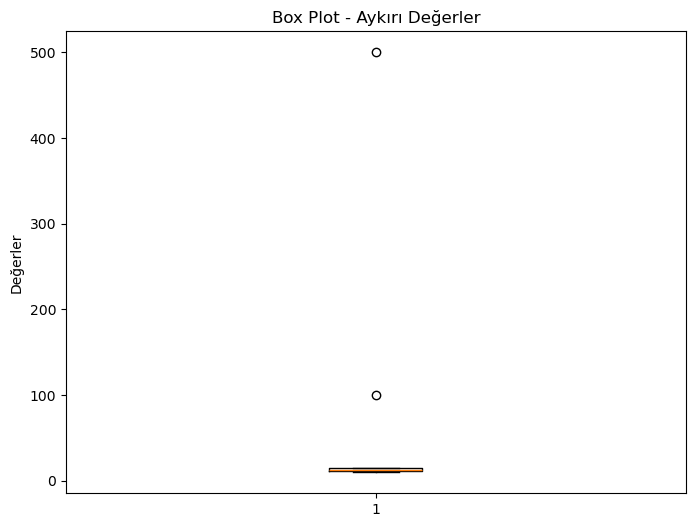

In [14]:
aykiri_df = pd.DataFrame({
    'değerler': [10,12,15,12,100,13,14,11,500,13]
})

#Box plot kullanarak aykırı değerleri görselleştirme
plt.figure(figsize=(8,6))
plt.boxplot(aykiri_df['değerler'])
plt.title('Box Plot - Aykırı Değerler')
plt.ylabel('Değerler')
plt.show()

In [15]:
#IQR(Interquartile Range) yöntemiyle aykırı değerlerin tespit edilmesi

#IQR hesaplama
q1 = aykiri_df['değerler'].quantile(0.25)
q3 = aykiri_df['değerler'].quantile(0.75)
iqr = q3 - q1

#Aykırı değerleri tespit etme
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

#Aykırı değerler
outliers = aykiri_df[(aykiri_df['değerler'] < lower_bound) | (aykiri_df['değerler'] > upper_bound)]
print("Aykırı Değerler:\n", outliers)

Aykırı Değerler:
    değerler
4       100
8       500


In [16]:
#Medyanı hesaplama
median_value = aykiri_df['değerler'].median()
print(f"Medyan:{median_value}")

#Aykırı değerleri medyan ile değiştirme
aykiri_df['değerler'] = aykiri_df['değerler'].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

print("Güncellenmiş Veri Seti:\n", aykiri_df)

Medyan:13.0
Güncellenmiş Veri Seti:
    değerler
0      10.0
1      12.0
2      15.0
3      12.0
4      13.0
5      13.0
6      14.0
7      11.0
8      13.0
9      13.0


Veri Normalizasyonu ve Standartlaştırma

In [17]:
df_final = pd.DataFrame({
    'müşteri_id': range(1,11),
    'yaş':[25,30,np.nan,45,35,28,np.nan,50,32,41],
    'gelir':[3000,4500,5000,9500,4000,3500,7000,np.nan,4200,150000],
    'harcama':[500,750,1000,2000,600,np.nan,1500,2500,800,50000],
    'kategori':['A', 'B', 'A', 'C', 'B', 'A', 'C', 'B', 'A', 'C']
})

print(f"Veri Seti:\n{df_final}")

Veri Seti:
   müşteri_id   yaş     gelir  harcama kategori
0           1  25.0    3000.0    500.0        A
1           2  30.0    4500.0    750.0        B
2           3   NaN    5000.0   1000.0        A
3           4  45.0    9500.0   2000.0        C
4           5  35.0    4000.0    600.0        B
5           6  28.0    3500.0      NaN        A
6           7   NaN    7000.0   1500.0        C
7           8  50.0       NaN   2500.0        B
8           9  32.0    4200.0    800.0        A
9          10  41.0  150000.0  50000.0        C


In [18]:
#1.Veri setindeki eksik verileri analiz edin ve uygun yöntemlerle doldurun.
print(df_final.isna().sum())

müşteri_id    0
yaş           2
gelir         1
harcama       1
kategori      0
dtype: int64


In [19]:
yas_mean = round(df_final['yaş'].mean())
gelir_mean = round(df_final['gelir'].mean())
harcama_mean = round(df_final['harcama'].mean())

df_final['yaş'] = df_final['yaş'].fillna(yas_mean)
df_final['gelir'] = df_final['gelir'].fillna(gelir_mean)
df_final['harcama'] = df_final['harcama'].fillna(harcama_mean)

print(df_final.set_index('müşteri_id'))

             yaş     gelir  harcama kategori
müşteri_id                                  
1           25.0    3000.0    500.0        A
2           30.0    4500.0    750.0        B
3           36.0    5000.0   1000.0        A
4           45.0    9500.0   2000.0        C
5           35.0    4000.0    600.0        B
6           28.0    3500.0   6628.0        A
7           36.0    7000.0   1500.0        C
8           50.0   21189.0   2500.0        B
9           32.0    4200.0    800.0        A
10          41.0  150000.0  50000.0        C


In [20]:
#2.Gelir ve harcama sütunundaki değerleri tespit ediniz ve düzeltiniz.

#Gelir sütunundaki IQR hesaplama
q1_gelir = df_final['gelir'].quantile(0.25)
q3_gelir = df_final['gelir'].quantile(0.75)

iqr_gelir = q3_gelir - q1_gelir

#Gelir sütunundaki aykırı değerlerin bulunması
lower_bound_gelir = q1_gelir - 1.5 * iqr_gelir
upper_bound_gelir = q3_gelir + 1.5 * iqr_gelir

#Aykırı değerler
outliers_gelir = df_final[(df_final['gelir'] < lower_bound_gelir) | (df_final['gelir'] > upper_bound_gelir)]
print(outliers_gelir['gelir'])

#Medyanın bulunması
median_gelir = df_final['gelir'].median()
print(f"Medyan:{median_gelir}")

#Aykırı değerlerin medyan ile değiştirilmesi
df_final['gelir'] = df_final['gelir'].apply(lambda x: median_gelir if x < lower_bound_gelir or x > upper_bound_gelir else x)

#Aykırı değerlerin görselleştirilmesi
#plt.figure(figsize=(10,6))
#sns.boxplot(x=df_final['gelir'])
#plt.title('Gelir Dağılımı Aykırı Değerler Grafiği')
#plt.show()

7     21189.0
9    150000.0
Name: gelir, dtype: float64
Medyan:4750.0


In [21]:
#Harcama sütunundaki IQR(Interquartile) hesaplama
q1_harcama = df_final['harcama'].quantile(0.25)
q3_harcama = df_final['harcama'].quantile(0.75)

iqr_harcama = q3_harcama - q1_harcama

#Harcama sütunundaki aykırı değerlerin tespit edilmesi
lower_bound_harcama = q1_harcama - 1.5 * iqr_harcama
upper_bound_harcama = q3_harcama + 1.5 * iqr_harcama

#Aykırı değerler
outliers_harcama = df_final[(df_final['harcama'] < lower_bound_harcama) | (df_final['harcama'] > upper_bound_harcama)]
print(outliers_harcama['harcama'])

#Medyanın bulunması
median_harcama = df_final['harcama'].median()
print(f"Medyan: {median_harcama}")

#Aykırı değerlerin medyan ile değiştirilmesi
df_final['harcama'] = df_final['harcama'].apply(lambda x: median_harcama if x < lower_bound_harcama or x > upper_bound_harcama else x)

5     6628.0
9    50000.0
Name: harcama, dtype: float64
Medyan: 1250.0


In [22]:
print("Güncellenmiş Veri Seti:\n", df_final.set_index('müşteri_id'))

Güncellenmiş Veri Seti:
              yaş   gelir  harcama kategori
müşteri_id                                
1           25.0  3000.0    500.0        A
2           30.0  4500.0    750.0        B
3           36.0  5000.0   1000.0        A
4           45.0  9500.0   2000.0        C
5           35.0  4000.0    600.0        B
6           28.0  3500.0   1250.0        A
7           36.0  7000.0   1500.0        C
8           50.0  4750.0   2500.0        B
9           32.0  4200.0    800.0        A
10          41.0  4750.0   1250.0        C


## Görevler:
1. Kategorilere göre ortalama gelir dağılımı (bar plot)
2. Yaş Dağılımı (histogram)
3. Gelir-harcama ilişkisi (scatter plot)

  kategori        gelir
0        A  3925.000000
1        B  4416.666667
2        C  7083.333333


Text(0, 0.5, 'Gelir')

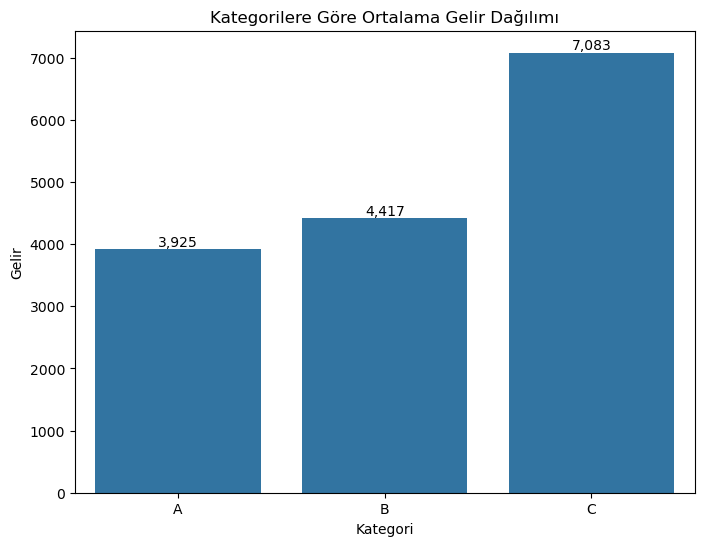

In [23]:
#Kategorilere göre ortalama gelir
avg_income = df_final.groupby('kategori')['gelir'].mean().reset_index()
print(avg_income)
#Bar plot ile görselleştirme
plt.figure(figsize=(8,6))
sns.barplot(
    x='kategori',
    y='gelir',
    data=avg_income
)
#Ortalama değerleri çubukların üzerine yazdıralım
for _,v in enumerate(avg_income['gelir']):
    plt.text(
        _,v,f'{v:,.0f}',
        ha='center',
        va='bottom'
    )
plt.title('Kategorilere Göre Ortalama Gelir Dağılımı')
plt.xlabel('Kategori')
plt.ylabel('Gelir')    

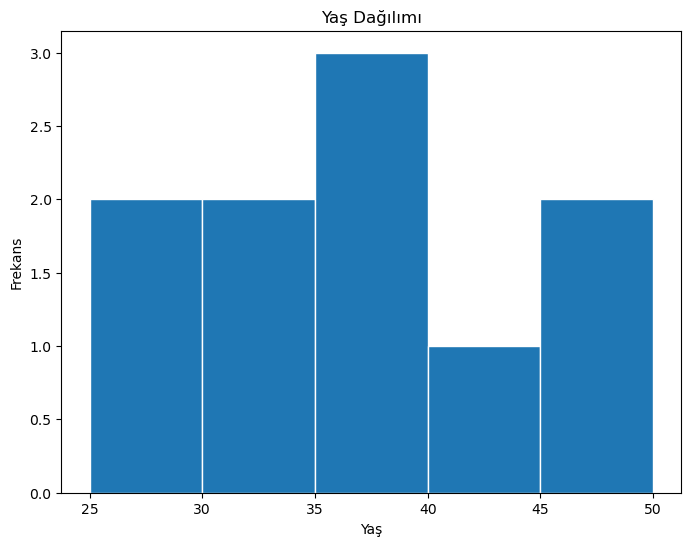

In [24]:
#Yaş Dağılımı Histogram
plt.figure(figsize=(8,6))
plt.hist(df_final['yaş'], bins=5, edgecolor='white')
plt.title('Yaş Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Frekans')
plt.show()

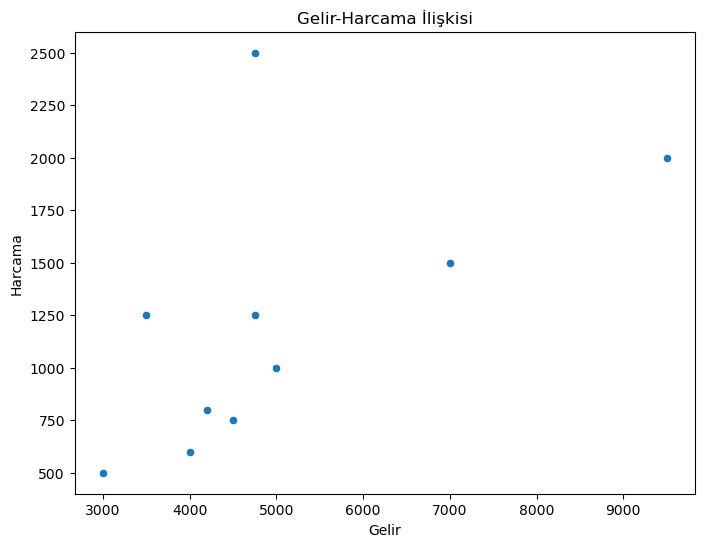

In [25]:
#Gelir Harcama İlişkisi (scatter plot)
plt.figure(figsize=(8,6))
sns.scatterplot(x='gelir',y='harcama',data=df_final)
plt.title('Gelir-Harcama İlişkisi')
plt.xlabel('Gelir')
plt.ylabel('Harcama')
plt.show()

In [26]:
df_final.to_csv('final.csv', index=False)

In [28]:
control = pd.read_csv('resources/final.csv', index_col='müşteri_id')
print(f"Veri setinin en yeni hali:\n\n{control}")

Veri setinin en yeni hali:

             yaş   gelir  harcama kategori
müşteri_id                                
1           25.0  3000.0    500.0        A
2           30.0  4500.0    750.0        B
3           36.0  5000.0   1000.0        A
4           45.0  9500.0   2000.0        C
5           35.0  4000.0    600.0        B
6           28.0  3500.0   1250.0        A
7           36.0  7000.0   1500.0        C
8           50.0  4750.0   2500.0        B
9           32.0  4200.0    800.0        A
10          41.0  4750.0   1250.0        C
